In [4]:
from ltlcross_wrapper import ResAnalyzer, gather_cumulative, gather_mins

In [5]:
nd_benchmarks = {}
for name in ["literature_nd","random_nd"]:
    b = ResAnalyzer(f"data/{name}.csv", cols=["states","time","acc","transitions"])
    nd_benchmarks[name] = b
    b.compute_best(["yes.owl#s","yes.owl#a"],"yes.owl#best")
    b.compute_best(["no.owl#s","no.owl#a"],"no.owl#best")

For each benchmark, we list the cumulative numbers of states for each tool. The best value for each benchmark is highlighted by green background. The benchmarks consist of `random` formulas or formulas from `literature`. The suffix `_nd` indicates that `ltl2tgba` created automata that are not semi-deterministic.

The considered tools are:
 * `owl#best` : `ltl2ldgba` from [Owl library](https://owl.model.in.tum.de/); the `#best` indicates the _best of owl_ approach where we run 2 runs of `ltl2ldgba` and choose the better result.
 * `seminator-1-1` is the last presented version of Seminator.
 * `seminator#def` is the default setting of Seminator 2.

`yes` in the name of tools means that the Spot simplifications were applied on the results of the tools (were not disabled for `seminator`) and `no` the opposite. 

The list of tools that are displayed can be controlled in cell `[3]`. If you want to see numbers where Spot's simplifications were disabled, change the `yes` prefix to `no`. These are (always both `yes.` and `no.` versions):

 * Owl without the _best of Owl_ approach; you can replace `#best` with `#a` or `#s` where `#a` stands for `ltl2ldgba -a` and analogously for `#s`.
 * `seminator-1-2` which implemented the SCC-aware optimization.
 * Seminator 2 set to use only one pipe-line; you can replace `#def` with `#tgba`, `#tba`, or `#sba` to see results of `seminator --via-tgba` etc.
 
 You can display all results by changing cell `[3]` to
 ```python
 tool_set = None
 ```

In [8]:
tool_set = ["no.owl#best","yes.owl#best","yes.seminator-1-1","yes.seminator#def"]

In [13]:
gather_cumulative(nd_benchmarks, tool_set=tool_set)

,literature_nd,random_nd
tool,,
no.owl#best,281,5041
yes.owl#best,234,4153
yes.seminator#def,230,3956
yes.seminator-1-1,297,7020


### Minimal automata

The following table shows for how many formulas each tool produces automaton that has the smallest number of states. The minimum ranges over the considered tools. The number in min hits shows how many times the same size as the smallest automaton was achieved. The number in unique min hits counts only cases where the given tool is the only tool with such a small automaton.

In [14]:
gather_mins(nd_benchmarks, tool_set=tool_set)

### Running times and timeouts
The older versions of Seminator reached the 30s timeout in one case for formulae from literature. Otherwise, most of the execution times were below 1s for all tools.

In [15]:
for name, b in nd_benchmarks.items():
    print(name)
    display(b.get_error_counts())
    display(b.values.time.max().loc[tool_set])

literature_nd


,timeout,parse error,incorrect,crash,no output
yes.seminator-1-1,1,0,0,0,0
yes.seminator-1-2,1,0,0,0,0


tool
no.owl#best           0.297720
yes.owl#best          0.505438
yes.seminator-1-1    30.017600
yes.seminator#def     0.197490
dtype: float64

random_nd


,timeout,parse error,incorrect,crash,no output
tool,,,,,


tool
no.owl#best          0.334122
yes.owl#best         0.401850
yes.seminator-1-1    7.845140
yes.seminator#def    0.418309
dtype: float64

### Scatter plots
We offer 2 interactive scatter plots that show how Seminator 2 compares to Owl (In[10]), and Seminator 1.2 (In[11]).

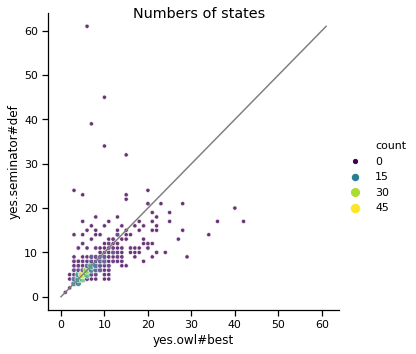

In [16]:
b = nd_benchmarks["random_nd"]
b.seaborn_scatter_plot("yes.owl#best","yes.seminator#def", include_equal=True)

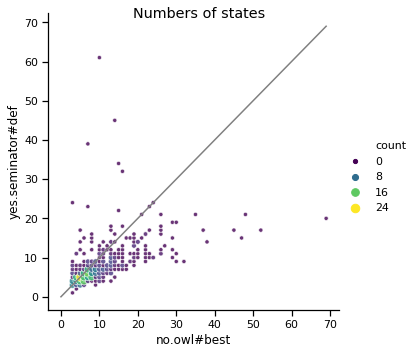

In [17]:
b = nd_benchmarks["random_nd"]
b.seaborn_scatter_plot("no.owl#best","yes.seminator#def", include_equal=True)

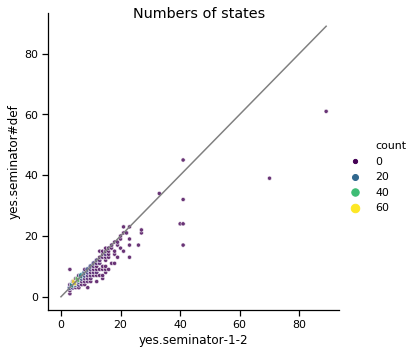

In [18]:
b.seaborn_scatter_plot("yes.seminator-1-2","yes.seminator#def", include_equal=True)

### Cross-comparison
The cross-comparison for a benchmark shows, in a cell (`row`,`column`) in how many cases the tool in `row` produces automaton that is better thatn the one produced by `column`. The last columns (`V`) summs the numbers across rows, while the green highlighting fill a space that is proportional to how well the tool in `row` competed agains `column` (proportional across columns).

In [19]:
for n, b in nd_benchmarks.items():
    print(n)
    display(b.cross_compare(tool_set=tool_set))

literature_nd


,no.owl#best,yes.owl#best,yes.seminator-1-1,yes.seminator#def,V
no.owl#best,nan,0,7,4,11
yes.owl#best,20,nan,16,8,44
yes.seminator-1-1,13,3,nan,7,23
yes.seminator#def,16,12,12,nan,40


random_nd


,no.owl#best,yes.owl#best,yes.seminator-1-1,yes.seminator#def,V
no.owl#best,nan,0,276,103,379
yes.owl#best,486,nan,363,165,1014
yes.seminator-1-1,222,128,nan,45,395
yes.seminator#def,394,315,426,nan,1135
